### Import required packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn import linear_model
from sklearn.metrics import r2_score
import math

### Load data file

In [2]:
df = pd.read_csv("datasets/Regression_housedata.csv", sep=';')

### Inspection and pre-processing
Preview data in first couple rows.

In [3]:
df.head()

,id,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
0,7129300520,3,1180,5650,1,1180,0,221900.0
1,6414100192,3,2570,7242,2,2170,400,538000.0
2,5631500400,2,770,10000,1,770,0,180000.0
3,2487200875,4,1960,5000,1,1050,910,604000.0
4,1954400510,3,1680,8080,1,1680,0,510000.0


Exclude <b>id</b> as it only contains unique values.

In [4]:
sdf = df.drop('id', axis=1)

Display statistics. Tells us amongst other things that there are big differences in scaling and that we should consider normalizing.

In [5]:
sdf.describe()

,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
mean,3.349349,2051.397397,14707.242242,1.397397,1750.233233,301.164164,5.207145e+05
std,0.852367,888.351113,28975.077254,0.527057,790.466905,451.023402,3.397491e+05
min,0.000000,380.000000,649.000000,1.000000,380.000000,0.000000,8.000000e+04
25%,3.000000,1405.000000,5419.000000,1.000000,1190.000000,0.000000,3.098000e+05
50%,3.000000,1900.000000,8040.000000,1.000000,1540.000000,0.000000,4.350000e+05
75%,4.000000,2475.000000,11508.500000,2.000000,2135.000000,580.000000,6.344625e+05
max,7.000000,6070.000000,315374.000000,3.000000,6070.000000,2060.000000,3.080000e+06


Plot below further shows that the values should be normalized.

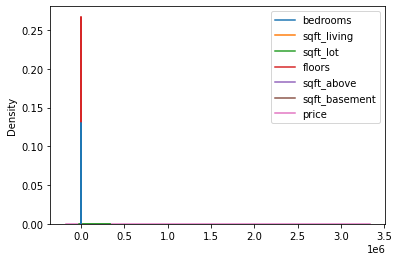

In [6]:
sns.kdeplot(data=sdf)
plt.show()

### Correlation matrix

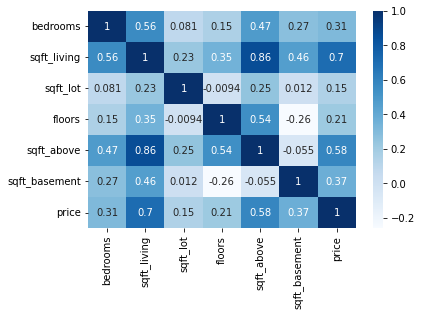

In [7]:
sns.heatmap(sdf.corr(), annot=True, cmap='Blues')
plt.show()

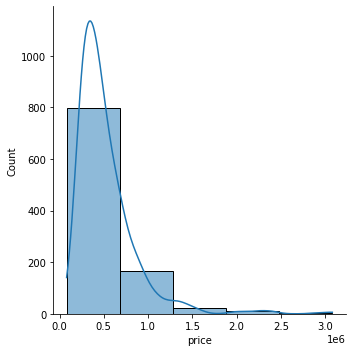

In [8]:
sns.displot(sdf['price'], bins=5, kde=True)
plt.show()

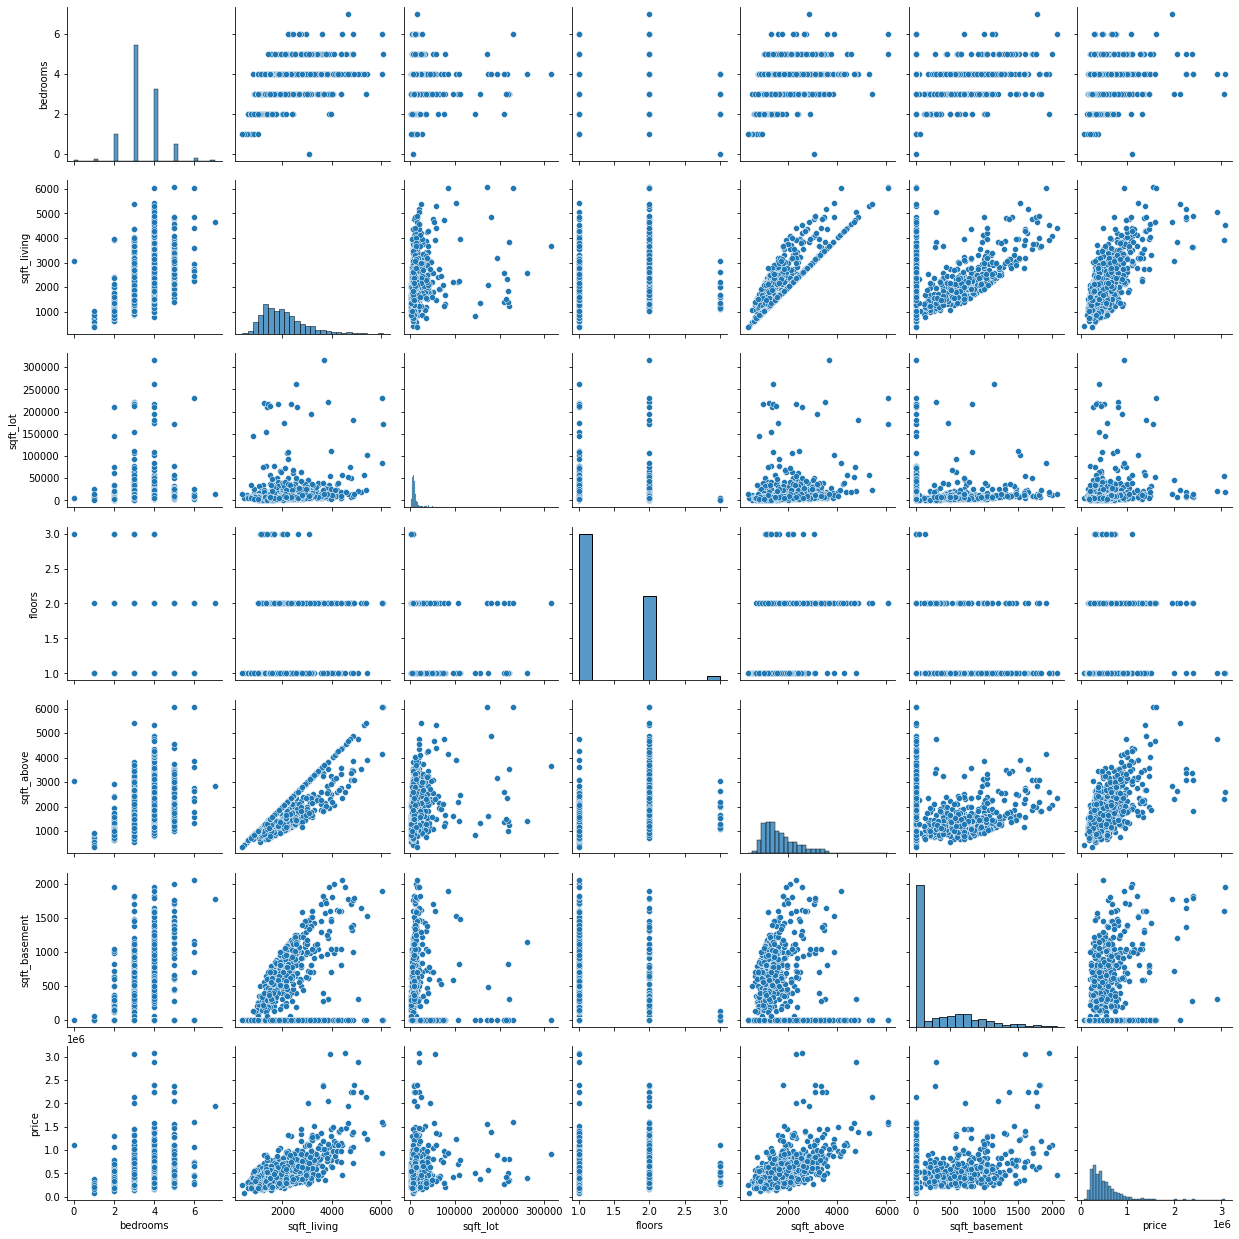

In [9]:
sns.pairplot(sdf)
plt.show()

The pairplot above shows that <b>sqft_living</b> and <b>sqft_above</b> have some correlation with <b>price</b>.
Some similarities can be seen from <b>sqft_lot</b> and <b>sqft_basement</b> to <b>price</b>.
There is little to no relationship from <b>bedrooms</b> and <b>floors</b> to the target column.

Create train and test set by splitting the data in two random partitions.

In [10]:
inputs = sdf.drop(['price', 'bedrooms', 'floors'], axis=1)
target = sdf[['price']]

msk = np.random.rand(len(inputs)) < 0.7 # Leave 30% for validation

X_train = inputs[msk]
X_test = inputs[~msk]
y_train = target[msk]
y_test = target[~msk]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((708, 4), (708, 1)), ((291, 4), (291, 1)))

### Feature scaling

This is usefull when features have different units. kNN especially benefits from this beause it's distance based. Use after train split or risk data leaking.

Scale, standardize or normalize source<br>
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [11]:
# fit scaler on training data
norm = StandardScaler().fit(X_train)

# transform training data
X_train_norm = pd.DataFrame(norm.transform(X_train), columns=X_train.columns)

# tranform testing data
X_test_norm = pd.DataFrame(norm.transform(X_test), columns=X_test.columns)

X_train_norm.describe()

,sqft_living,sqft_lot,sqft_above,sqft_basement
count,7.080000e+02,7.080000e+02,7.080000e+02,7.080000e+02
mean,9.032323e-17,-1.003591e-17,-1.354848e-16,-2.007183e-17
std,1.000707e+00,1.000707e+00,1.000707e+00,1.000707e+00
min,-1.823843e+00,-4.880652e-01,-1.702044e+00,-6.524779e-01
25%,-7.239127e-01,-3.342878e-01,-7.166216e-01,-6.524779e-01
50%,-1.526309e-01,-2.356524e-01,-2.757747e-01,-6.524779e-01
75%,4.726527e-01,-1.072281e-01,5.054319e-01,6.007166e-01
max,4.565418e+00,8.924742e+00,5.584896e+00,3.823217e+00


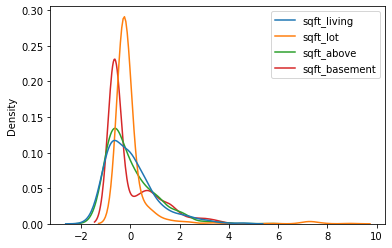

In [12]:
sns.kdeplot(data=X_train_norm)
plt.show()

## Multilinear Regressor
Apply the linear regression model to the training data.

In [13]:
# create an object of the LinearRegression class
mlr = linear_model.LinearRegression()

# fit the training data
mlr.fit(X_train_norm, y_train)

# the coefficients
print ('Coefficients: ', mlr.coef_)
print ('Intercept: ', mlr.intercept_)

Coefficients:  [[ 2.77782527e+18 -6.14400000e+03 -2.43562484e+18 -1.41120078e+18]]
Intercept:  [515544.35566652]


### Prediction

In [14]:
y_pred_mlr = mlr.predict(X_test_norm)
print("Residual sum of squares: %.2f"
      % np.mean((y_pred_mlr - y_test) ** 2, axis=0))

rmse_mlr = mean_squared_error(y_test, y_pred_mlr, squared=False)
print('Root mean squared error:', rmse_mlr)

print("R2-score: %.2f" % r2_score(y_test , y_pred_mlr))

Residual sum of squares: 69258238415.71
Root mean squared error: 263169.6000979404
R2-score: 0.48


## K-nearest Neighbours Regression

In [15]:
rmse_val = [] # to store rmse values for different k
rmse_lowest = -1
k_lowest = -1 # to store k for the lowest value of rmse

for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train_norm, y_train)  # fit the model
    pred=knn.predict(X_test_norm) # make prediction on test set
    error = math.sqrt(mean_squared_error(y_test, pred)) # calculate rmse
    rmse_val.append(error) # store rmse values
    if rmse_lowest < 0 or error < rmse_lowest:
        rmse_lowest = error
        k_lowest = K
    print('RMSE value for k =' , K , 'is:', error)

RMSE value for k = 1 is: 319546.7780441037
RMSE value for k = 2 is: 276048.55201199837
RMSE value for k = 3 is: 266177.0957623556
RMSE value for k = 4 is: 267891.30884639564
RMSE value for k = 5 is: 261424.6336242839
RMSE value for k = 6 is: 263281.57269586
RMSE value for k = 7 is: 259672.82567710683
RMSE value for k = 8 is: 261659.79174996345
RMSE value for k = 9 is: 262532.40113296517
RMSE value for k = 10 is: 261849.28290533286
RMSE value for k = 11 is: 263888.4124805915
RMSE value for k = 12 is: 265997.2467617919
RMSE value for k = 13 is: 268984.2189933359
RMSE value for k = 14 is: 268268.0594716203
RMSE value for k = 15 is: 264725.56020602386
RMSE value for k = 16 is: 264732.60721768334
RMSE value for k = 17 is: 265692.58066942106
RMSE value for k = 18 is: 263690.51551070914
RMSE value for k = 19 is: 266158.8042486849
RMSE value for k = 20 is: 266695.8665845226


Plotting the rmse values against k values.

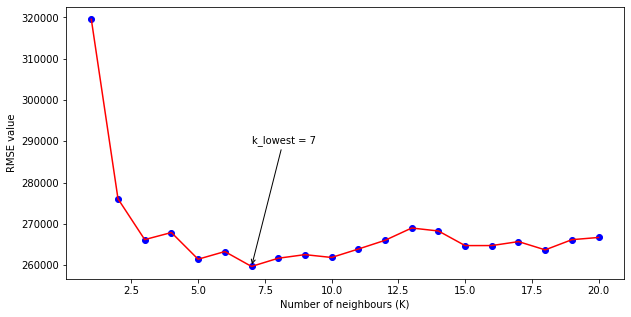

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(np.arange(1, len(rmse_val)+1), rmse_val, color='blue')
plt.plot(np.arange(1, len(rmse_val)+1), rmse_val, color='red')
plt.xlabel('Number of neighbours (K)')
plt.ylabel('RMSE value')
y_rel_center = (max(rmse_val) + rmse_val[k_lowest-1]) / 2
plt.annotate(F'k_lowest = {k_lowest}', xy = (k_lowest, rmse_val[k_lowest-1]), xytext = (k_lowest, y_rel_center),
             arrowprops=dict(arrowstyle="->"))
plt.show()

In [17]:
# create a kNN Regressor object instance
knn = neighbors.KNeighborsRegressor(n_neighbors = k_lowest)

# fit training data
knn.fit(X_train_norm, y_train)

# predictions on test data
y_pred_knn = knn.predict(X_test_norm)

### Evaluation
kNN seems to slightly outperform MLR in most cases.

In [18]:
print('MLR')
print("Root Mean Square error: %.2f" % rmse_mlr)
print("R2-score: %.2f" % r2_score(y_test , y_pred_mlr))

print('\nKNN')
print("Root Mean Square error: %.2f" % mean_squared_error(y_test, y_pred_knn, squared=False))
print("R2-score: %.2f" % r2_score(y_test , y_pred_knn))

MLR
Root Mean Square error: 263169.60
R2-score: 0.48

KNN
Root Mean Square error: 259672.83
R2-score: 0.49
